# Import Librarys and Load Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, f1_score, recall_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv("/content/ALAMEDA_PD_tremor_dataset.csv")

In [ ]:
pd.set_option('display.max_columns',None)

# Set colors

In [ ]:
custom_palette =["#1B263B","#34495E","#5DADE2","#85C1E9","#AED6F1"]
custom_palette2 =["#1B263B","#85C1E9"]

In [ ]:
from matplotlib.colors import ListedColormap
colors = [custom_palette[0], custom_palette[1],custom_palette[2],custom_palette[3]]

# EDA

In [ ]:
data.head()

,start_timestamp,end_timestamp,subject_id,Magnitude_mean,Magnitude_std_dev,Magnitude_var,Magnitude_avg_diff_mean,Magnitude_above_mean_rt,Magnitude_median,Magnitude_med_dev,Magnitude_iqr,Magnitude_skewness,Magnitude_kurtosis,Magnitude_min,Magnitude_max,Magnitude_maxmin_diff,Magnitude_peaks_rt,Magnitude_rest_rt,Magnitude_ssc_rt,Magnitude_rms,Magnitude_energy,Magnitude_sampen,Magnitude_dfa,PC1_mean,PC1_mean_abs,PC1_std_dev,PC1_var,PC1_avg_diff_mean,PC1_above_mean_rt,PC1_median,PC1_med_dev,PC1_iqr,PC1_skewness,PC1_kurtosis,PC1_min,PC1_max,PC1_maxmin_diff,PC1_neg_rt,PC1_pos_rt,PC1_zero_cross_rt,PC1_peaks_rt,PC1_rest_rt,PC1_ssc_rt,PC1_rms,PC1_energy,PC1_sampen,PC1_dfa,Magnitude_fft_mean,Magnitude_fft_std_dev,Magnitude_fft_var,Magnitude_fft_avg_diff_mean,Magnitude_fft_above_mean_rt,Magnitude_fft_median,Magnitude_fft_med_dev,Magnitude_fft_iqr,Magnitude_fft_skewness,Magnitude_fft_kurtosis,Magnitude_fft_min,Magnitude_fft_max,Magnitude_fft_maxmin_diff,Magnitude_fft_peaks_rt,Magnitude_fft_rest_rt,Magnitude_fft_ssc_rt,Magnitude_fft_rms,Magnitude_fft_tot_power,Magnitude_fft_dom_freq_rt,Magnitude_fft_energy,Magnitude_fft_dom_freq,Magnitude_fft_pw_ar_dom_freq,Magnitude_fft_entropy,Magnitude_fft_flatness,PC1_fft_mean,PC1_fft_std_dev,PC1_fft_var,PC1_fft_avg_diff_mean,PC1_fft_above_mean_rt,PC1_fft_median,PC1_fft_med_dev,PC1_fft_iqr,PC1_fft_skewness,PC1_fft_kurtosis,PC1_fft_min,PC1_fft_max,PC1_fft_maxmin_diff,PC1_fft_peaks_rt,PC1_fft_rest_rt,PC1_fft_ssc_rt,PC1_fft_rms,PC1_fft_tot_power,PC1_fft_dom_freq_rt,PC1_fft_energy,PC1_fft_dom_freq,PC1_fft_pw_ar_dom_freq,PC1_fft_entropy,PC1_fft_flatness,Constancy_of_rest,Kinetic_tremor,Postural_tremor,Rest_tremor
0,15:00.0,15:20.5,11,0.026806,0.030615,0.000937,0.018907,0.329102,0.017788,0.010122,0.024215,4.905112,41.975663,0.000164,0.389060,0.388896,0.147949,0.996094,0.295898,0.040692,0.001656,0.435199,1.056523,-0.000004,0.014534,0.027887,0.000778,0.014534,0.485840,-0.000217,0.006641,0.013244,1.228254,32.417605,-0.269603,0.326559,0.596162,0.514160,0.485840,0.133789,0.085938,0.998535,0.171875,0.027887,0.000778,0.337741,0.266619,0.002372,0.046406,0.002154,0.003928,0.061463,2.520449e-05,2.413191e-05,0.000483,31.017984,977.325338,5.868363e-09,1.471561,1.471561,0.357073,0.999024,0.714146,0.046467,0.236743,6.215862,4.857954,0,0,3.515421,0.016937,0.000777,0.002679,7.176830e-06,0.001265,0.151220,9.797962e-09,6.521362e-09,1.353408e-05,6.370242,55.689219,2.002414e-09,0.034885,0.034885,0.181463,1.0,0.361951,0.002789,0.077541,0.449896,1.591135,5.810547,0.535356,6.922100,0.000267,1,0,0,0
1,15:10.2,15:30.7,11,0.013529,0.013011,0.000169,0.008200,0.345215,0.009880,0.004664,0.010736,4.201000,32.384367,0.000739,0.172558,0.171819,0.152344,1.000000,0.304688,0.018770,0.000352,0.634916,1.001258,0.000005,0.005602,0.010317,0.000106,0.005602,0.497070,-0.000022,0.003407,0.006792,2.490251,39.620418,-0.070313,0.133512,0.203825,0.502930,0.497070,0.139160,0.087891,1.000000,0.175293,0.010317,0.000106,0.494615,0.250598,0.000535,0.011745,0.000138,0.000904,0.065366,5.199438e-06,5.032426e-06,0.000085,31.596728,1003.470302,5.059279e-10,0.374842,0.374842,0.299512,0.999024,0.600000,0.011757,0.053378,7.022418,1.095313,0,0,3.057381,0.013811,0.000106,0.000324,1.052411e-07,0.000170,0.167805,3.882831e-09,3.288251e-09,6.422181e-06,4.909814,30.818171,2.567321e-10,0.003401,0.003401,0.209756,1.0,0.419512,0.000341,0.010614,0.320393,0.217790,6.542969,0.075632,7.140168,0.000547,1,0,0,0
2,15:20.5,15:40.9,11,0.007208,0.004947,0.000024,0.003428,0.369629,0.006022,0.002229,0.004693,2.318882,8.673266,0.000188,0.043305,0.043118,0.158203,1.000000,0.316406,0.008742,0.000076,0.921368,0.977662,0.000008,0.002951,0.003916,0.000015,0.002951,0.503418,0.000036,0.002331,0.004653,-0.419369,2.543328,-0.025140,0.012732,0.037873,0.496582,0.503418,0.150879,0.091797,1.000000,0.183105,0.003916,0.000015,0.703026,0.189970,0.000128,0.003322,0.000011,0.000226,0.032195,8.924115e-07,8.594200e-07,0.000014,31.922039,1017.997894,1.009577e-09,0.106395,0.106395,0.329756,1.000000,0.659512,0.0

In [ ]:
data.shape

(4151, 99)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4151 entries, 0 to 4150
Data columns (total 99 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   start_timestamp               4151 non-null   object 
 1   end_timestamp                 4151 non-null   object 
 2   subject_id                    4151 non-null   int64  
 3   Magnitude_mean                4151 non-null   float64
 4   Magnitude_std_dev             4151 non-null   float64
 5   Magnitude_var                 4151 non-null   float64
 6   Magnitude_avg_diff_mean       4151 non-null   float64
 7   Magnitude_above_mean_rt       4151 non-null   float64
 8   Magnitude_median              4151 non-null   float64
 9   Magnitude_med_dev             4151 non-null   float64
 10  Magnitude_iqr                 4151 non-null   float64
 11  Magnitude_skewness            4151 non-null   float64
 12  Magnitude_kurtosis            4151 non-null   float64
 13  Mag

In [ ]:
data.describe()

,subject_id,Magnitude_mean,Magnitude_std_dev,Magnitude_var,Magnitude_avg_diff_mean,Magnitude_above_mean_rt,Magnitude_median,Magnitude_med_dev,Magnitude_iqr,Magnitude_skewness,Magnitude_kurtosis,Magnitude_min,Magnitude_max,Magnitude_maxmin_diff,Magnitude_peaks_rt,Magnitude_rest_rt,Magnitude_ssc_rt,Magnitude_rms,Magnitude_energy,Magnitude_sampen,Magnitude_dfa,PC1_mean,PC1_mean_abs,PC1_std_dev,PC1_var,PC1_avg_diff_mean,PC1_above_mean_rt,PC1_median,PC1_med_dev,PC1_iqr,PC1_skewness,PC1_kurtosis,PC1_min,PC1_max,PC1_maxmin_diff,PC1_neg_rt,PC1_pos_rt,PC1_zero_cross_rt,PC1_peaks_rt,PC1_rest_rt,PC1_ssc_rt,PC1_rms,PC1_energy,PC1_sampen,PC1_dfa,Magnitude_fft_mean,Magnitude_fft_std_dev,Magnitude_fft_var,Magnitude_fft_avg_diff_mean,Magnitude_fft_above_mean_rt,Magnitude_fft_median,Magnitude_fft_med_dev,Magnitude_fft_iqr,Magnitude_fft_skewness,Magnitude_fft_kurtosis,Magnitude_fft_min,Magnitude_fft_max,Magnitude_fft_maxmin_diff,Magnitude_fft_peaks_rt,Magnitude_fft_rest_rt,Magnitude_fft_ssc_rt,Magnitude_fft_rms,Magnitude_fft_tot_power,Magnitude_fft_dom_freq_rt,Magnitude_fft_energy,Magnitude_fft_dom_freq,Magnitude_fft_pw_ar_dom_freq,Magnitude_fft_entropy,Magnitude_fft_flatness,PC1_fft_mean,PC1_fft_std_dev,PC1_fft_var,PC1_fft_avg_diff_mean,PC1_fft_above_mean_rt,PC1_fft_median,PC1_fft_med_dev,PC1_fft_iqr,PC1_fft_skewness,PC1_fft_kurtosis,PC1_fft_min,PC1_fft_max,PC1_fft_maxmin_diff,PC1_fft_peaks_rt,PC1_fft_rest_rt,PC1_fft_ssc_rt,PC1_fft_rms,PC1_fft_tot_power,PC1_fft_dom_freq_rt,PC1_fft_energy,PC1_fft_dom_freq,PC1_fft_pw_ar_dom_freq,PC1_fft_entropy,PC1_fft_flatness,Constancy_of_rest,Kinetic_tremor,Postural_tremor,Rest_tremor
count,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4.151000e+03,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4.151000e+03,4.151000e+03,4151.000000,4151.000000,4151.000000,4.151000e+03,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.0,4151.0,4151.000000,4151.000000,4151.000000,4151.000000,4.151000e+03,4151.000000,4151.000000,4.151000e+03,4.151000e+03,4.151000e+03,4151.000000,4151.000000,4.151000e+03,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000
mean,9.460371,0.052362,0.050635,0.005066,0.033773,0.350425,0.037290,0.018581,0.043723,2.738626,14.730768,0.001739,0.463716,0.461977,0.138980,0.948425,0.277958,0.073819,0.010472,0.604106,1.049166,-6.271725e-07,0.031965,0.052067,0.005348,0.031965,0.499913,-0.000024,0.019120,0.038255,0.065596,12.228674,-0.332825,0.344050,0.676874,0.500050,0.499950,0.133382,0.082951,0.987594,0.165899,0.052067,0.005348,0.501968,0.283724,0.015863,0.348737,0.556920,0.027682,0.040957,6.832782e-05,6.617791e-05,0.001734,30.827809,967.372120,7.869626e-08,11.071386,11.071386,0.318680,0.995404,0.637794,0.349115,1.583201,7.193595,32.487232,0.0,0.0,2.647706,0.008406,0.005343,0.019971,3.014853e-03,0.008802,0.149386,3.327699e-06,1.764340e-06,1.230902e-04,5.856459,49.559957,5.931956e-07,0.254704,0.254704,0.172890,0.994715,0.345260,0.020702,0.533248,0.418646,10.942234,5.159654,3.564846,6.889171,0.003853,0.758853,0.042159,0.210793,0.379427
std,4.925205,0.051622,0.050032,0.010192,0.033322,0.069697,0.039725,0.019996,0.045629,1.663926,21.373073,0.002184,0.499930,0.498882,0.016223,0.091634,0.032444,0.070883,0.019455,0.349374,0.113072,1.835859e-04,0.032074,0.051358,0.010418,0.032075,0.011307,0.001095,0.020623,0.041284,0.974

In [ ]:
data.columns

Index(['start_timestamp', 'end_timestamp', 'subject_id', 'Magnitude_mean',
       'Magnitude_std_dev', 'Magnitude_var', 'Magnitude_avg_diff_mean',
       'Magnitude_above_mean_rt', 'Magnitude_median', 'Magnitude_med_dev',
       'Magnitude_iqr', 'Magnitude_skewness', 'Magnitude_kurtosis',
       'Magnitude_min', 'Magnitude_max', 'Magnitude_maxmin_diff',
       'Magnitude_peaks_rt', 'Magnitude_rest_rt', 'Magnitude_ssc_rt',
       'Magnitude_rms', 'Magnitude_energy', 'Magnitude_sampen',
       'Magnitude_dfa', 'PC1_mean', 'PC1_mean_abs', 'PC1_std_dev', 'PC1_var',
       'PC1_avg_diff_mean', 'PC1_above_mean_rt', 'PC1_median', 'PC1_med_dev',
       'PC1_iqr', 'PC1_skewness', 'PC1_kurtosis', 'PC1_min', 'PC1_max',
       'PC1_maxmin_diff', 'PC1_neg_rt', 'PC1_pos_rt', 'PC1_zero_cross_rt',
       'PC1_peaks_rt', 'PC1_rest_rt', 'PC1_ssc_rt', 'PC1_rms', 'PC1_energy',
       'PC1_sampen', 'PC1_dfa', 'Magnitude_fft_mean', 'Magnitude_fft_std_dev',
       'Magnitude_fft_var', 'Magnitude_fft_avg_diff

In [ ]:
nulls=data.isnull().sum().sum()
print(f"Total Numbers of Null Values = {nulls} ")

Total Numbers of Null Values = 0 


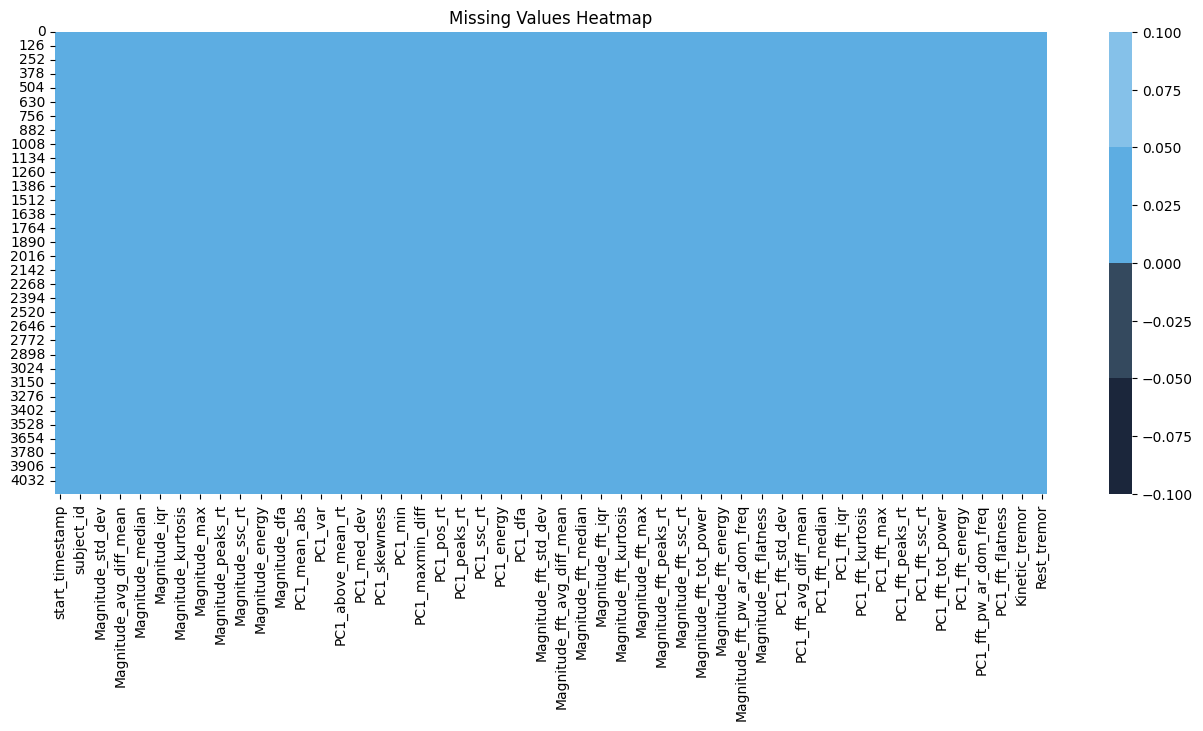

In [ ]:
plt.figure(figsize=(16,6))
cmap_custom = ListedColormap(colors)
sns.heatmap(data.isnull(), cmap=cmap_custom)
plt.title('Missing Values Heatmap')
plt.show()

In [ ]:
dups=data.duplicated().sum()
print(f"Total Numbers of duplicated Rows = {dups} ")

Total Numbers of duplicated Rows = 0 


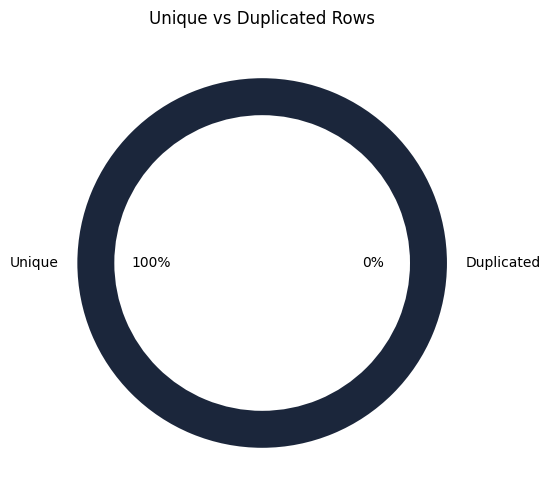

In [ ]:
unique = len(data) - dups
sizes = [unique, dups]
labels = ['Unique', 'Duplicated']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.0f%%', wedgeprops={'width':0.2}, colors=custom_palette)
plt.title("Unique vs Duplicated Rows")
plt.show()

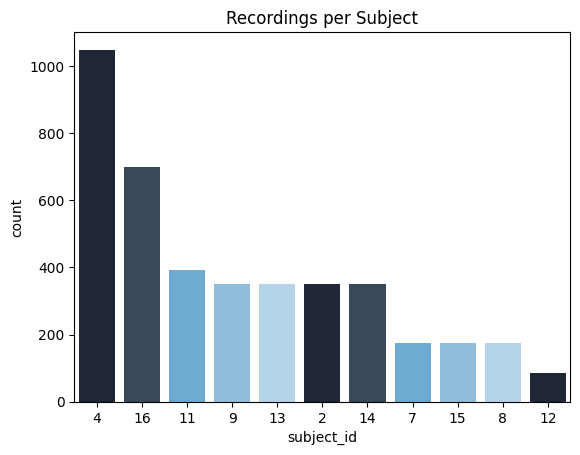

In [ ]:
# distribution of subjects
sns.countplot(data=data, x='subject_id', order=data['subject_id'].value_counts().index,
              palette=custom_palette)
plt.title('Recordings per Subject')
plt.show()

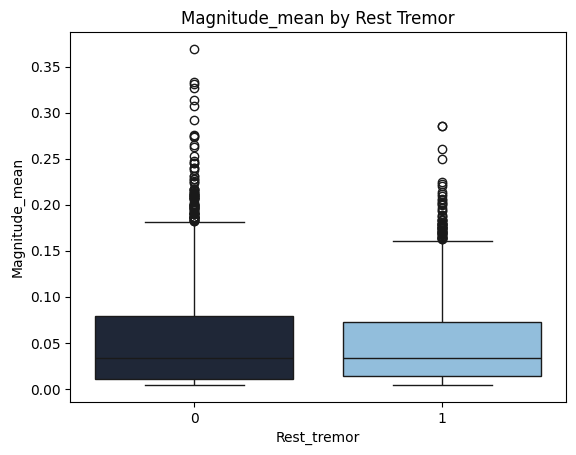

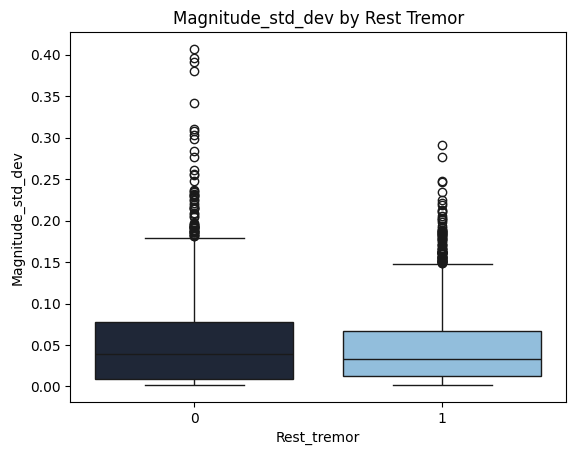

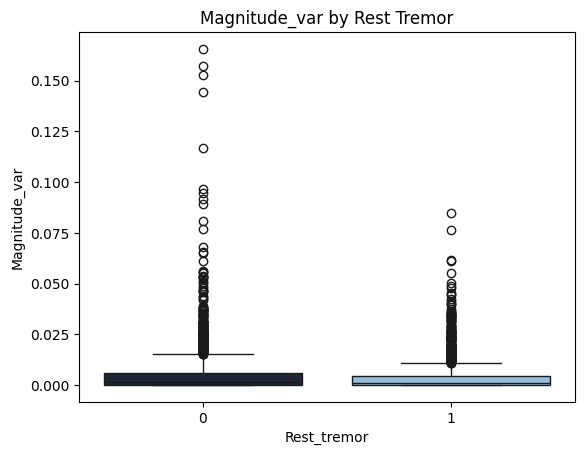

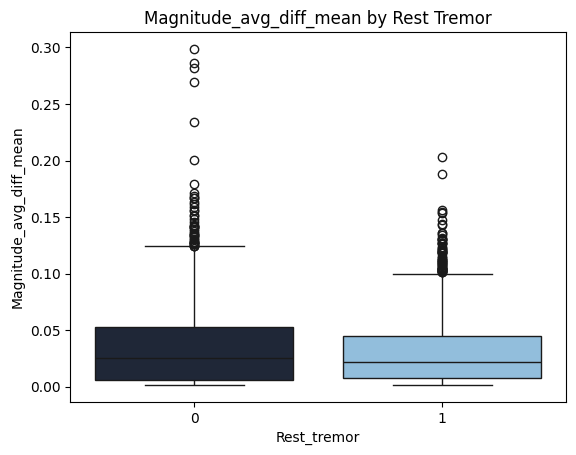

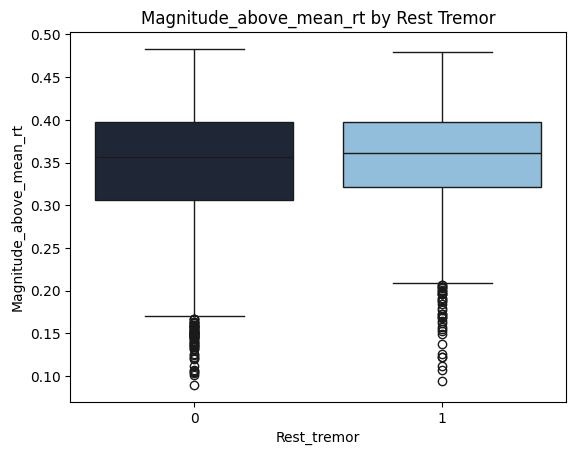

In [ ]:
mag_cols = [col for col in data.columns if col.startswith('Magnitude_') or col.startswith('PC1_')]

for col in mag_cols[:5]:
    plt.figure()
    sns.boxplot(data=data, x='Rest_tremor', y=col ,palette=custom_palette2)
    plt.title(f'{col} by Rest Tremor')
    plt.show()

In [ ]:
data['subject_id'].value_counts()

,count
subject_id,
4,1050
16,700
11,392
9,350
13,350
2,350
14,350
7,175
15,175


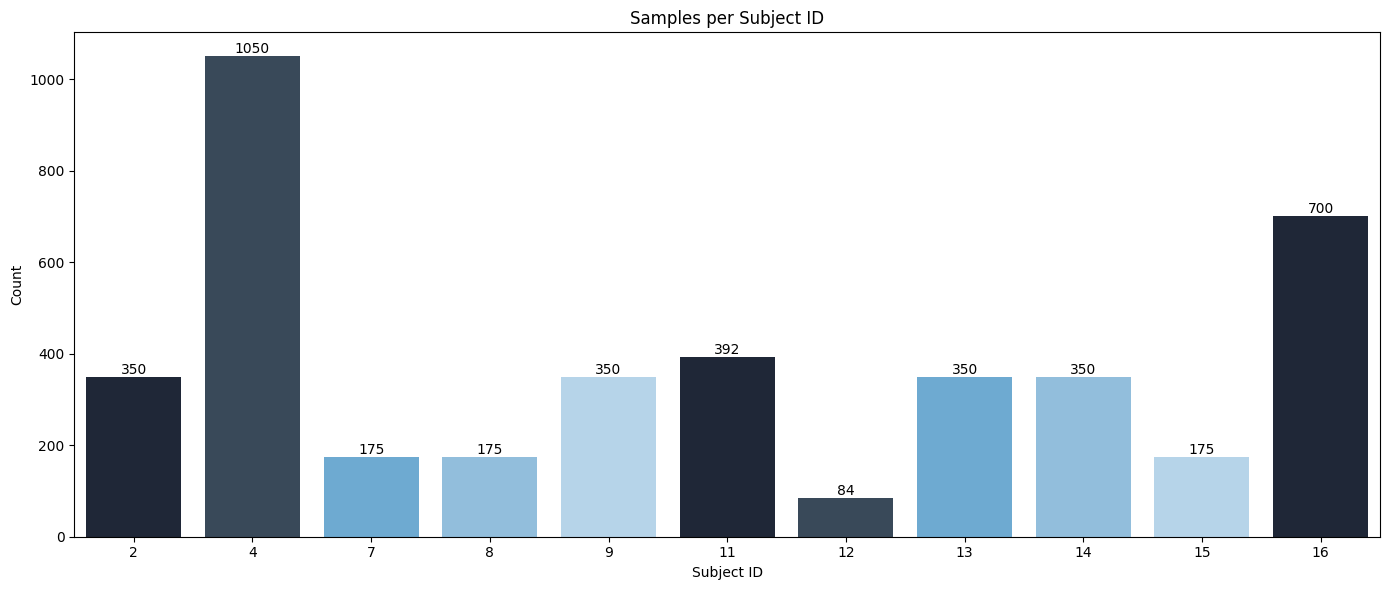

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

counts = data['subject_id'].value_counts()

plt.figure(figsize=(14, 6))
ax = sns.barplot(x=counts.index, y=counts.values, palette=custom_palette)

for container in ax.containers:
    ax.bar_label(container)

plt.title("Samples per Subject ID")
plt.xlabel("Subject ID")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

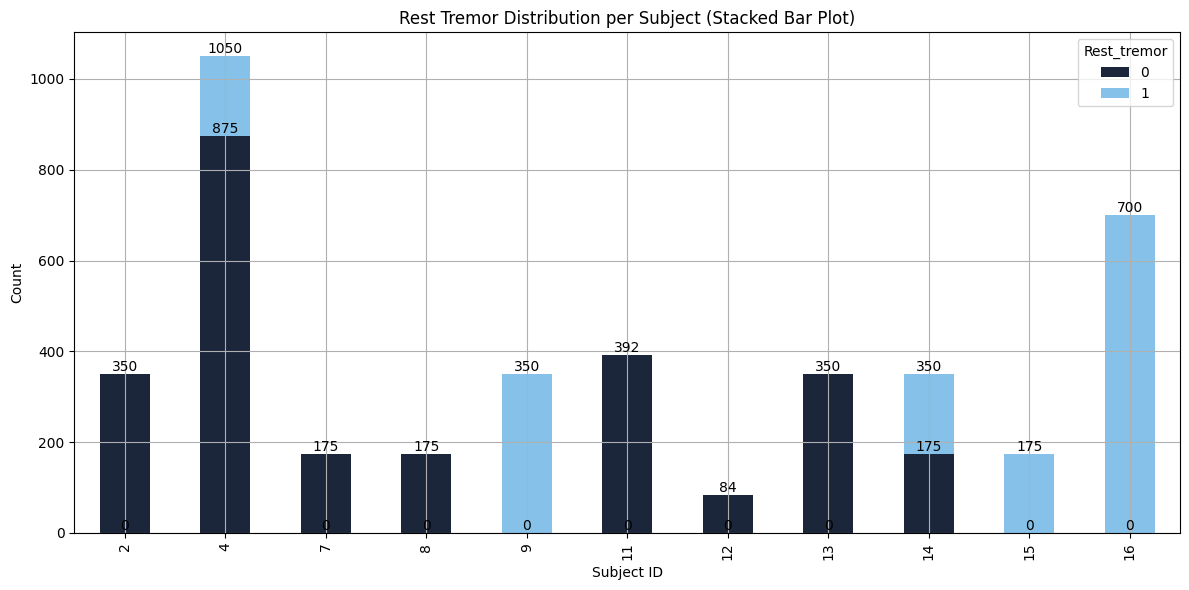

In [ ]:
crosstab = pd.crosstab(data['subject_id'], data['Rest_tremor'])

plt.figure(figsize=(12, 6))
ax = crosstab.plot(kind='bar',stacked=True,figsize=(12, 6),grid=True,color=custom_palette2)

for container in ax.containers:
    ax.bar_label(container)
plt.title("Rest Tremor Distribution per Subject (Stacked Bar Plot)")
plt.xlabel("Subject ID")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [ ]:
crosstab_df = pd.DataFrame(crosstab)
crosstab_df

Rest_tremor,0,1
subject_id,,
2,350,0
4,875,175
7,175,0
8,175,0
9,0,350
11,392,0
12,84,0
13,350,0
14,175,175


# Target Columns EDA

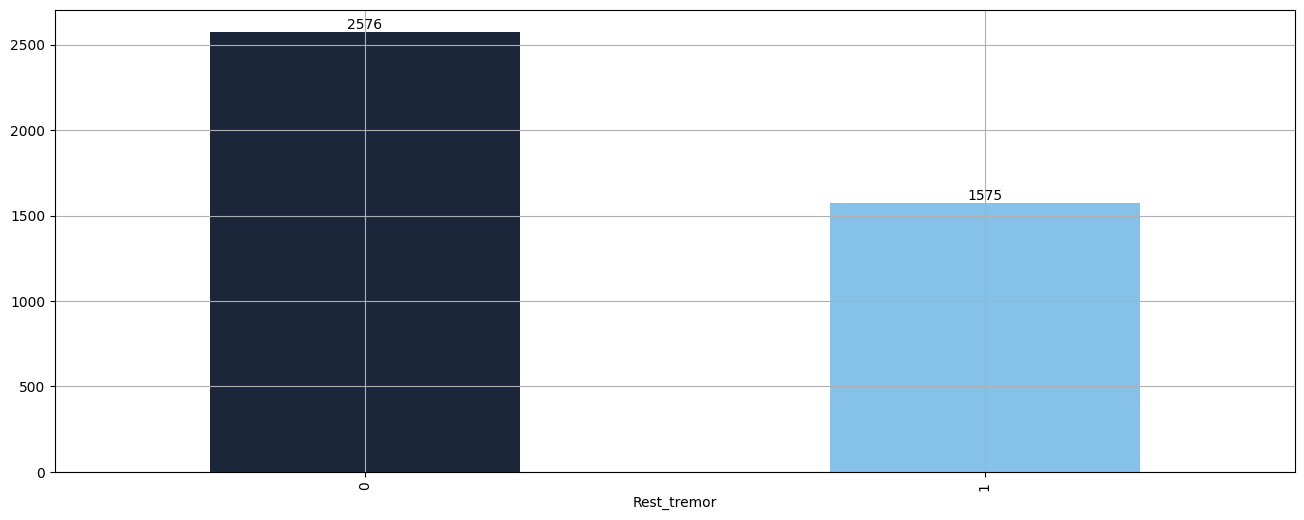

In [ ]:
ax = data['Rest_tremor'].value_counts().plot(kind='bar', figsize=(16,6), grid=True,color=custom_palette2)
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
data['Rest_tremor'].value_counts()

,count
Rest_tremor,
0,2576
1,1575


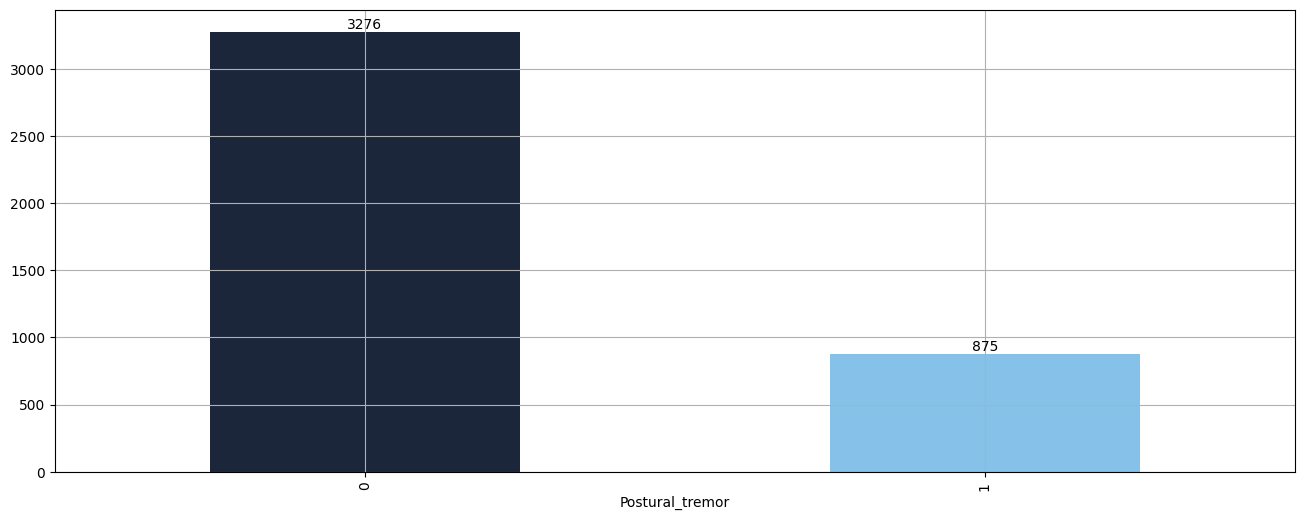

In [ ]:
ax = data['Postural_tremor'].value_counts().plot(kind='bar', figsize=(16,6), grid=True,color=custom_palette2)
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
data['Postural_tremor'].value_counts()

,count
Postural_tremor,
0,3276
1,875


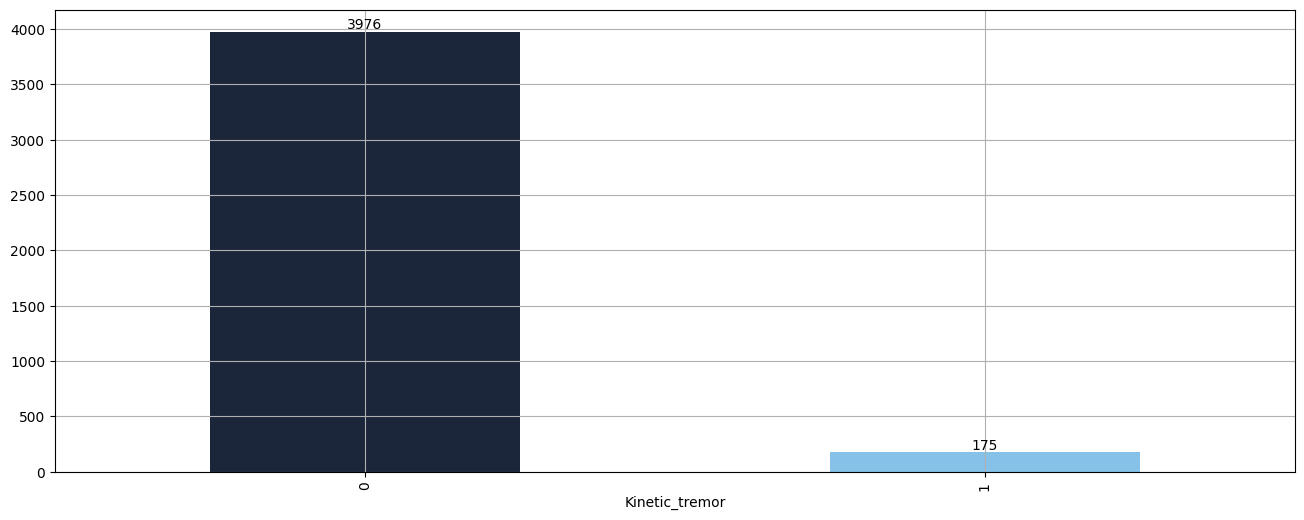

In [ ]:
ax = data['Kinetic_tremor'].value_counts().plot(kind='bar', figsize=(16,6), grid=True,color=custom_palette2)
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
data['Kinetic_tremor'].value_counts()

,count
Kinetic_tremor,
0,3976
1,175


Kinetic_tremor( رعشة أثناء الحركة ) → 3976 (class 0) vs 175 (class 1) → strong imbalance

Postural_tremor( رعشة أثناء رفع اليد ) → 3276 (class 0) vs 875 (class 1) → moderate imbalance

Rest_tremor( رعشة أثناء الراحة ) → 2576 (class 0) vs 1575 (class 1) → balanced

# preprocessing

In [ ]:
target_col = 'Rest_tremor'
X = data.drop(columns=[target_col])
y = data[target_col]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
non_numeric_cols = ['start_timestamp', 'end_timestamp']

# Drop non-numeric columns before scaling
X_train_numeric = X_train.drop(columns=non_numeric_cols, errors='ignore')
X_test_numeric = X_test.drop(columns=non_numeric_cols, errors='ignore')

# Scaling MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

In [ ]:
# Class Weights
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weight_dict = dict(zip(classes, class_weights))

In [ ]:
# PCA
pca = PCA(n_components=40)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

#  Feature Selection، PCA
X_train_selected = X_train_pca
X_test_selected = X_test_pca

# MLP Deep Neural Network ( Best Model )

In [ ]:
# Neural Network
input_dim = X_train_selected.shape[1]

model = Sequential()
model.add(Dense(128, input_dim=input_dim, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train_selected, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.1,
    class_weight=class_weight_dict,
    callbacks=[early_stop],
    verbose=2
)

y_pred_prob = model.predict(X_test_selected).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

print(f'Accuracy: {acc:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Recall: {rec:.4f}')


Epoch 1/100
94/94 - 3s - 33ms/step - accuracy: 0.7443 - loss: 0.4938 - val_accuracy: 0.6235 - val_loss: 0.5854
Epoch 2/100
94/94 - 0s - 5ms/step - accuracy: 0.8420 - loss: 0.3394 - val_accuracy: 0.6566 - val_loss: 0.5094
Epoch 3/100
94/94 - 1s - 6ms/step - accuracy: 0.8601 - loss: 0.2913 - val_accuracy: 0.8313 - val_loss: 0.4016
Epoch 4/100
94/94 - 1s - 15ms/step - accuracy: 0.8725 - loss: 0.2680 - val_accuracy: 0.8855 - val_loss: 0.3005
Epoch 5/100
94/94 - 2s - 19ms/step - accuracy: 0.8812 - loss: 0.2536 - val_accuracy: 0.8946 - val_loss: 0.2425
Epoch 6/100
94/94 - 1s - 14ms/step - accuracy: 0.8845 - loss: 0.2373 - val_accuracy: 0.8976 - val_loss: 0.2153
Epoch 7/100
94/94 - 1s - 14ms/step - accuracy: 0.8926 - loss: 0.2361 - val_accuracy: 0.9006 - val_loss: 0.1959
Epoch 8/100
94/94 - 1s - 10ms/step - accuracy: 0.8936 - loss: 0.2189 - val_accuracy: 0.9127 - val_loss: 0.1795
Epoch 9/100
94/94 - 1s - 14ms/step - accuracy: 0.8986 - loss: 0.2141 - val_accuracy: 0.9187 - val_loss: 0.1826
Epo

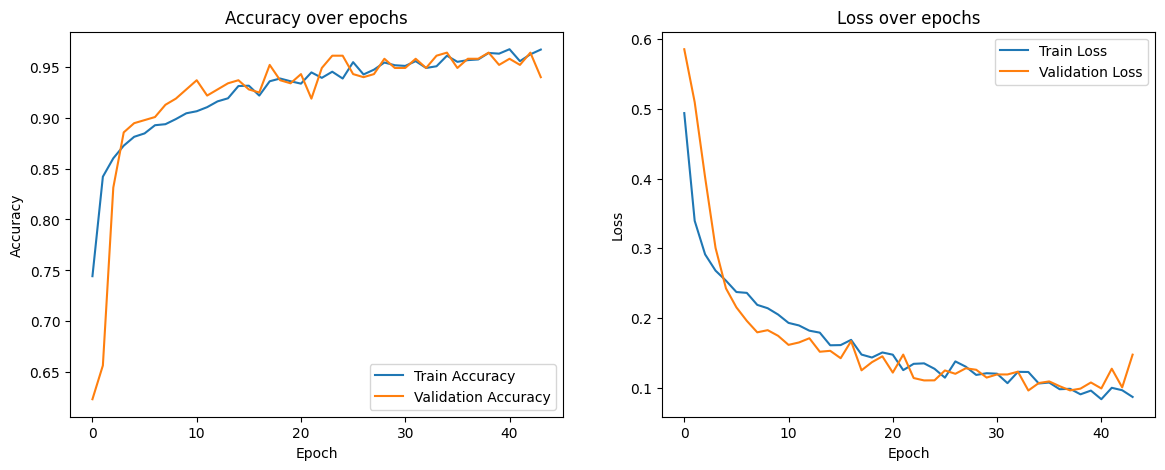

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report


y_pred_prob = model.predict(X_test_selected).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)


acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
5
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nConfusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy: 0.9627
Precision: 0.9303
Recall: 0.9746
F1 Score: 0.9519

Confusion Matrix:
[[493  23]
 [  8 307]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       516
           1       0.93      0.97      0.95       315

    accuracy                           0.96       831
   macro avg       0.96      0.97      0.96       831
weighted avg       0.96      0.96      0.96       831



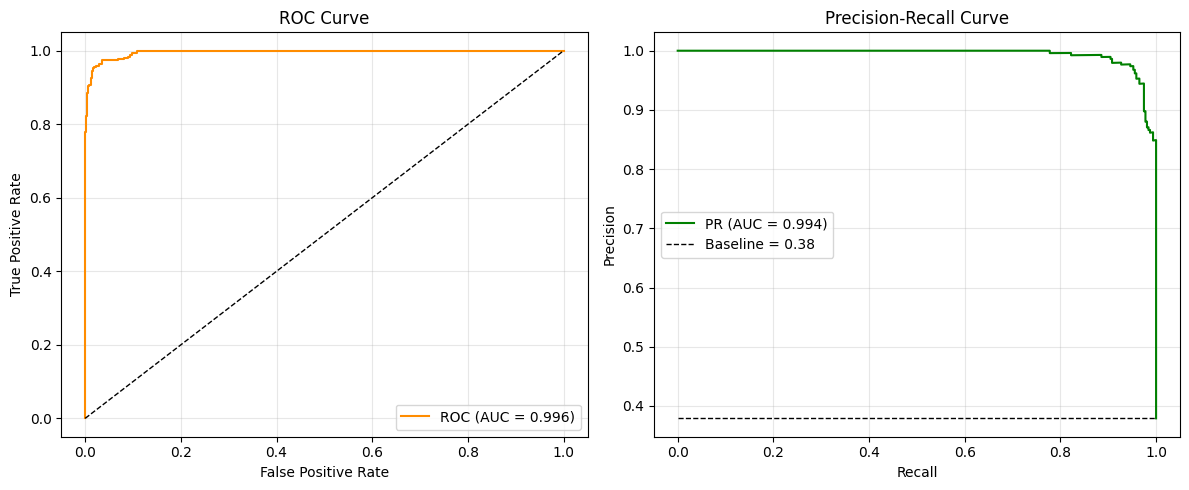

In [ ]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr) # Calculate roc_auc
ax[0].plot(fpr, tpr, label=f'ROC (AUC = {roc_auc:.3f})', color='darkorange')
ax[0].plot([0, 1], [0, 1], 'k--', lw=1)
ax[0].set_xlabel('False Positive Rate'); ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('ROC Curve'); ax[0].legend(); ax[0].grid(alpha=0.3)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
pr_auc = auc(recall, precision) # Calculate pr_auc
ax[1].plot(recall, precision, label=f'PR (AUC = {pr_auc:.3f})', color='green')
# Baseline = proportion of positives
pos_ratio = np.mean(y_test)
ax[1].plot([0, 1], [pos_ratio, pos_ratio], 'k--', lw=1, label=f'Baseline = {pos_ratio:.2f}')
ax[1].set_xlabel('Recall'); ax[1].set_ylabel('Precision')
ax[1].set_title('Precision-Recall Curve'); ax[1].legend(); ax[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

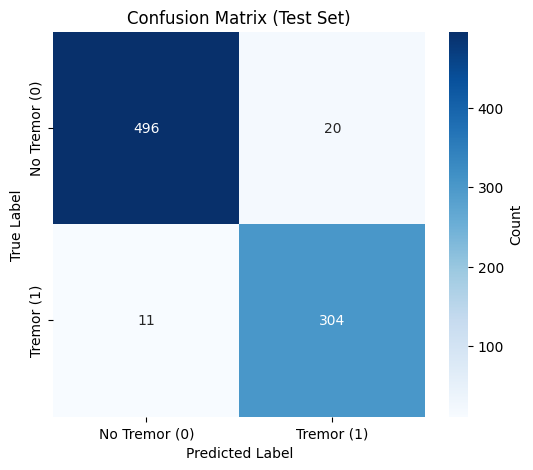

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Tremor (0)', 'Tremor (1)'],
            yticklabels=['No Tremor (0)', 'Tremor (1)'],
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix (Test Set)')
plt.ylabel('True Label'); plt.xlabel('Predicted Label')
plt.show()

# CNN 1D model

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, f1_score, recall_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Conv1D, MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
data= pd.read_csv('/content/ALAMEDA_PD_tremor_dataset.csv')

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

X_train_cnn = X_train_pca[..., np.newaxis]
X_test_cnn = X_test_pca[..., np.newaxis]

def build_cnn_model(input_shape):
    model = Sequential()

    model.add(Conv1D(
        filters=32,
        kernel_size=3,
        activation='relu',
        padding='same',
        kernel_regularizer=l2(0.001),
        input_shape=input_shape
    ))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.4))

    model.add(Conv1D(
        filters=64,
        kernel_size=3,
        activation='relu',
        padding='same',
        kernel_regularizer=l2(0.001),
    ))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.4))

    model.add(Flatten())

    # Dense layer
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.5))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = build_cnn_model(X_train_cnn.shape[1:])


# 3) Callbacks: EarlyStopping + ReduceLRO

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=6,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    verbose=1
)


history = model.fit(
    X_train_cnn, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=16,
    class_weight=class_weight_dict,
    callbacks=[early_stop, reduce_lr],
    verbose=2
)

y_pred_prob = model.predict(X_test_cnn).flatten()

#  Thresholds
thresholds = [0.4, 0.5, 0.6]
for thresh in thresholds:
    y_pred = (y_pred_prob >= thresh).astype(int)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Threshold = {thresh}")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("="*30)


prec, rec, th = precision_recall_curve(y_test, y_pred_prob)
f1_scores = 2 * (prec * rec) / (prec + rec + 1e-8)

best_thresh = th[np.argmax(f1_scores)]
print("Best Threshold =", best_thresh)

Epoch 1/100
166/166 - 4s - 24ms/step - accuracy: 0.6999 - loss: 0.7999 - val_accuracy: 0.4232 - val_loss: 0.8392 - learning_rate: 1.0000e-03
Epoch 2/100
166/166 - 2s - 10ms/step - accuracy: 0.7956 - loss: 0.5747 - val_accuracy: 0.7169 - val_loss: 0.6994 - learning_rate: 1.0000e-03
Epoch 3/100
166/166 - 1s - 9ms/step - accuracy: 0.8106 - loss: 0.5332 - val_accuracy: 0.7997 - val_loss: 0.5590 - learning_rate: 1.0000e-03
Epoch 4/100
166/166 - 1s - 6ms/step - accuracy: 0.8166 - loss: 0.5010 - val_accuracy: 0.8268 - val_loss: 0.4664 - learning_rate: 1.0000e-03
Epoch 5/100
166/166 - 1s - 6ms/step - accuracy: 0.8321 - loss: 0.4606 - val_accuracy: 0.8283 - val_loss: 0.4358 - learning_rate: 1.0000e-03
Epoch 6/100
166/166 - 1s - 6ms/step - accuracy: 0.8325 - loss: 0.4505 - val_accuracy: 0.8419 - val_loss: 0.4088 - learning_rate: 1.0000e-03
Epoch 7/100
166/166 - 1s - 6ms/step - accuracy: 0.8396 - loss: 0.4185 - val_accuracy: 0.8614 - val_loss: 0.3830 - learning_rate: 1.0000e-03
Epoch 8/100
166/16

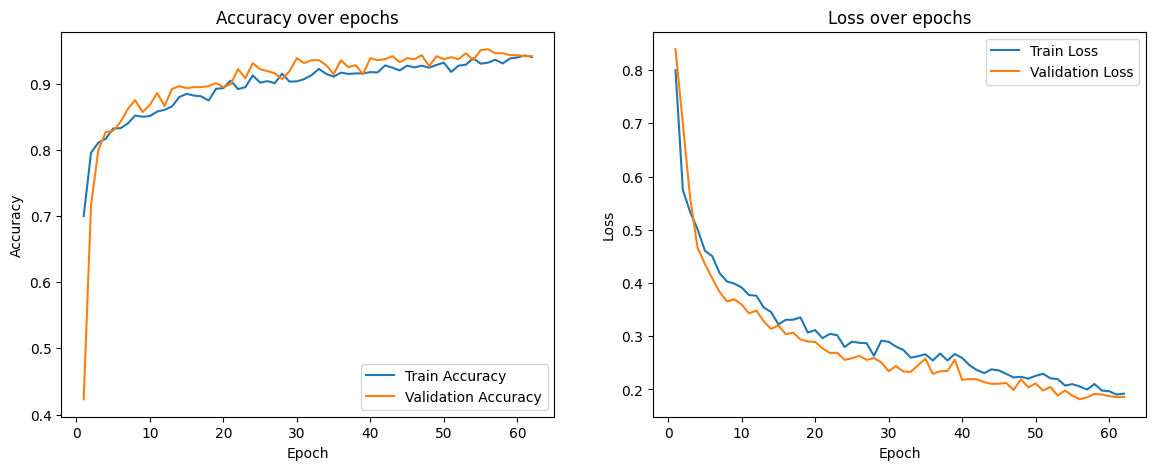

In [ ]:
import matplotlib.pyplot as plt

# Extract metrics from history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))

# Accuracy Plot
plt.subplot(1,2,1)
plt.plot(epochs, acc, label='Train Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1,2,2)
plt.plot(epochs, loss, label='Train Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report

# Apply the best threshold instead of 0.5
y_pred = (y_pred_prob >= best_thresh).astype(int)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Best Threshold: {best_thresh:.4f}")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")

print("\nConfusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Best Threshold: 0.5933
Accuracy: 0.9639
Precision: 0.9305
Recall: 0.9778
F1 Score: 0.9536

Confusion Matrix:
[[493  23]
 [  7 308]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       516
           1       0.93      0.98      0.95       315

    accuracy                           0.96       831
   macro avg       0.96      0.97      0.96       831
weighted avg       0.96      0.96      0.96       831



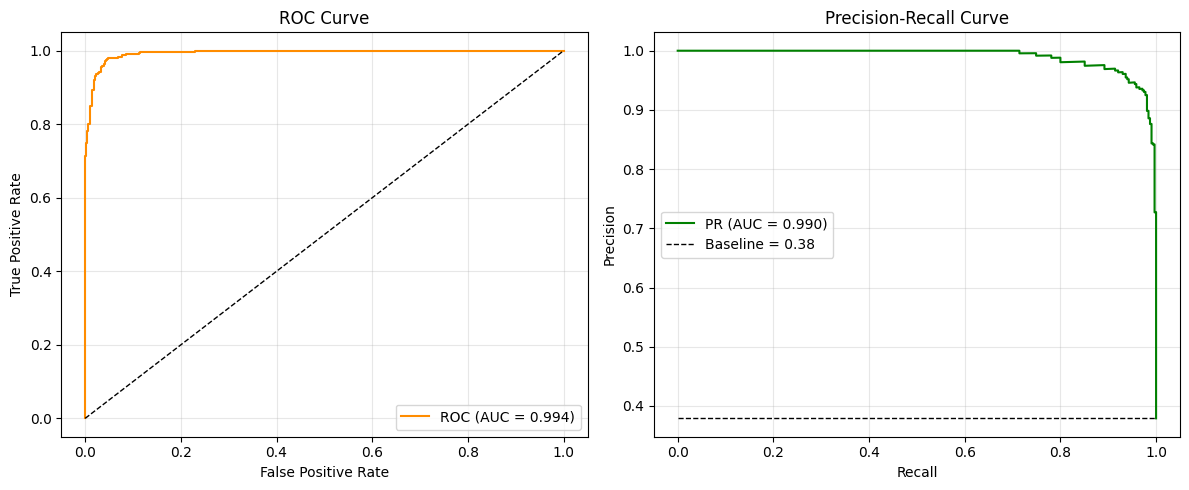

In [ ]:
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score, average_precision_score

# ======== Compute AUC Values ========
roc_auc = roc_auc_score(y_test, y_pred_prob)
pr_auc = average_precision_score(y_test, y_pred_prob)

# ======== Plotting ========
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
ax[0].plot(fpr, tpr, label=f'ROC (AUC = {roc_auc:.3f})', color='darkorange')
ax[0].plot([0, 1], [0, 1], 'k--', lw=1)
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('ROC Curve')
ax[0].legend()
ax[0].grid(alpha=0.3)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
ax[1].plot(recall, precision, label=f'PR (AUC = {pr_auc:.3f})', color='green')

# Baseline = proportion of positives
pos_ratio = np.mean(y_test)
ax[1].plot([0, 1], [pos_ratio, pos_ratio], 'k--', lw=1, label=f'Baseline = {pos_ratio:.2f}')

ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')
ax[1].set_title('Precision-Recall Curve')
ax[1].legend()
ax[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()


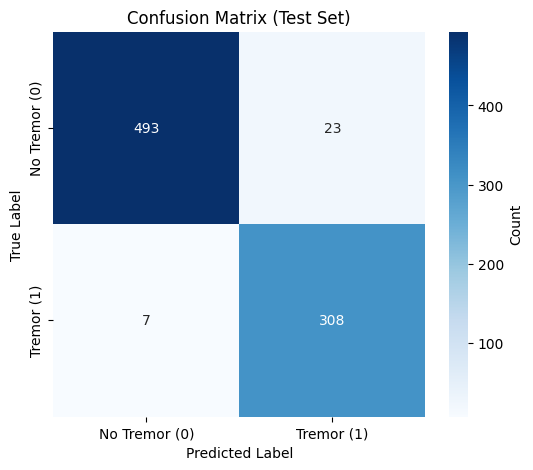

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Tremor (0)', 'Tremor (1)'],
            yticklabels=['No Tremor (0)', 'Tremor (1)'],
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix (Test Set)')
plt.ylabel('True Label'); plt.xlabel('Predicted Label')
plt.show()